# Cross Section from the Ross Sea through the Transantarctic Mountains

In [12]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2
import pandas as pd
from polartoolkit import fetch, maps, profiles, regions, utils

In [36]:
# highest point in the TAM; Mt. Kirkpatrick (4518 m)
lat, lon = -84.332216, 166.431087

kirkpatrick = utils.latlon_to_epsg3031(pd.DataFrame(dict(lat=lat, lon=lon), index=[0]))

returning grid with new region and/or registration, same spacing


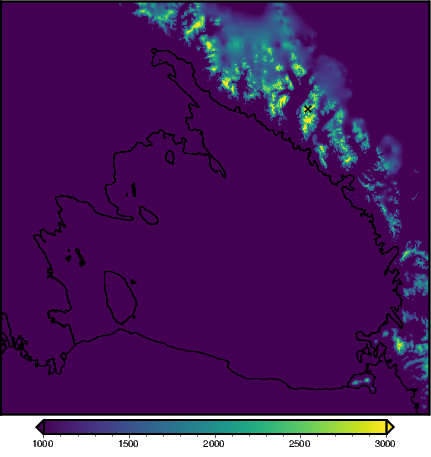

In [30]:
maps.plot_grd(
    fetch.bedmap2(layer="bed", region=regions.ross_ice_shelf),
    coast=True,
    # robust=True,
    cpt_lims=[1e3, 3e3],
    points=kirkpatrick,
    points_style="x.3c",
)

In [44]:
lines = profiles.draw_lines(points=kirkpatrick)

Label(value='')

Map(center=[-84.33221599999999, 166.431087], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [45]:
# get clicked points
df = utils.shapes_to_df(lines)
# extract first and last
a = (df.x.iloc[0], df.y.iloc[0])
b = (df.x.iloc[-1], df.y.iloc[-1])

# through Mt. Kirkpatrick
# a, b = ((73091.97680652462, -731187.4944468881),
# (194907.82734099624, -508979.50010407553))

# up the Beardmore glacier
a, b = ((67973.675569968, -723450.6373140787), (225617.71300327074, -558586.6217080841))
a, b

((67973.675569968, -723450.6373140787),
 (225617.71300327074, -558586.6217080841))

legend [WARNING]: File <stdin> is empty!


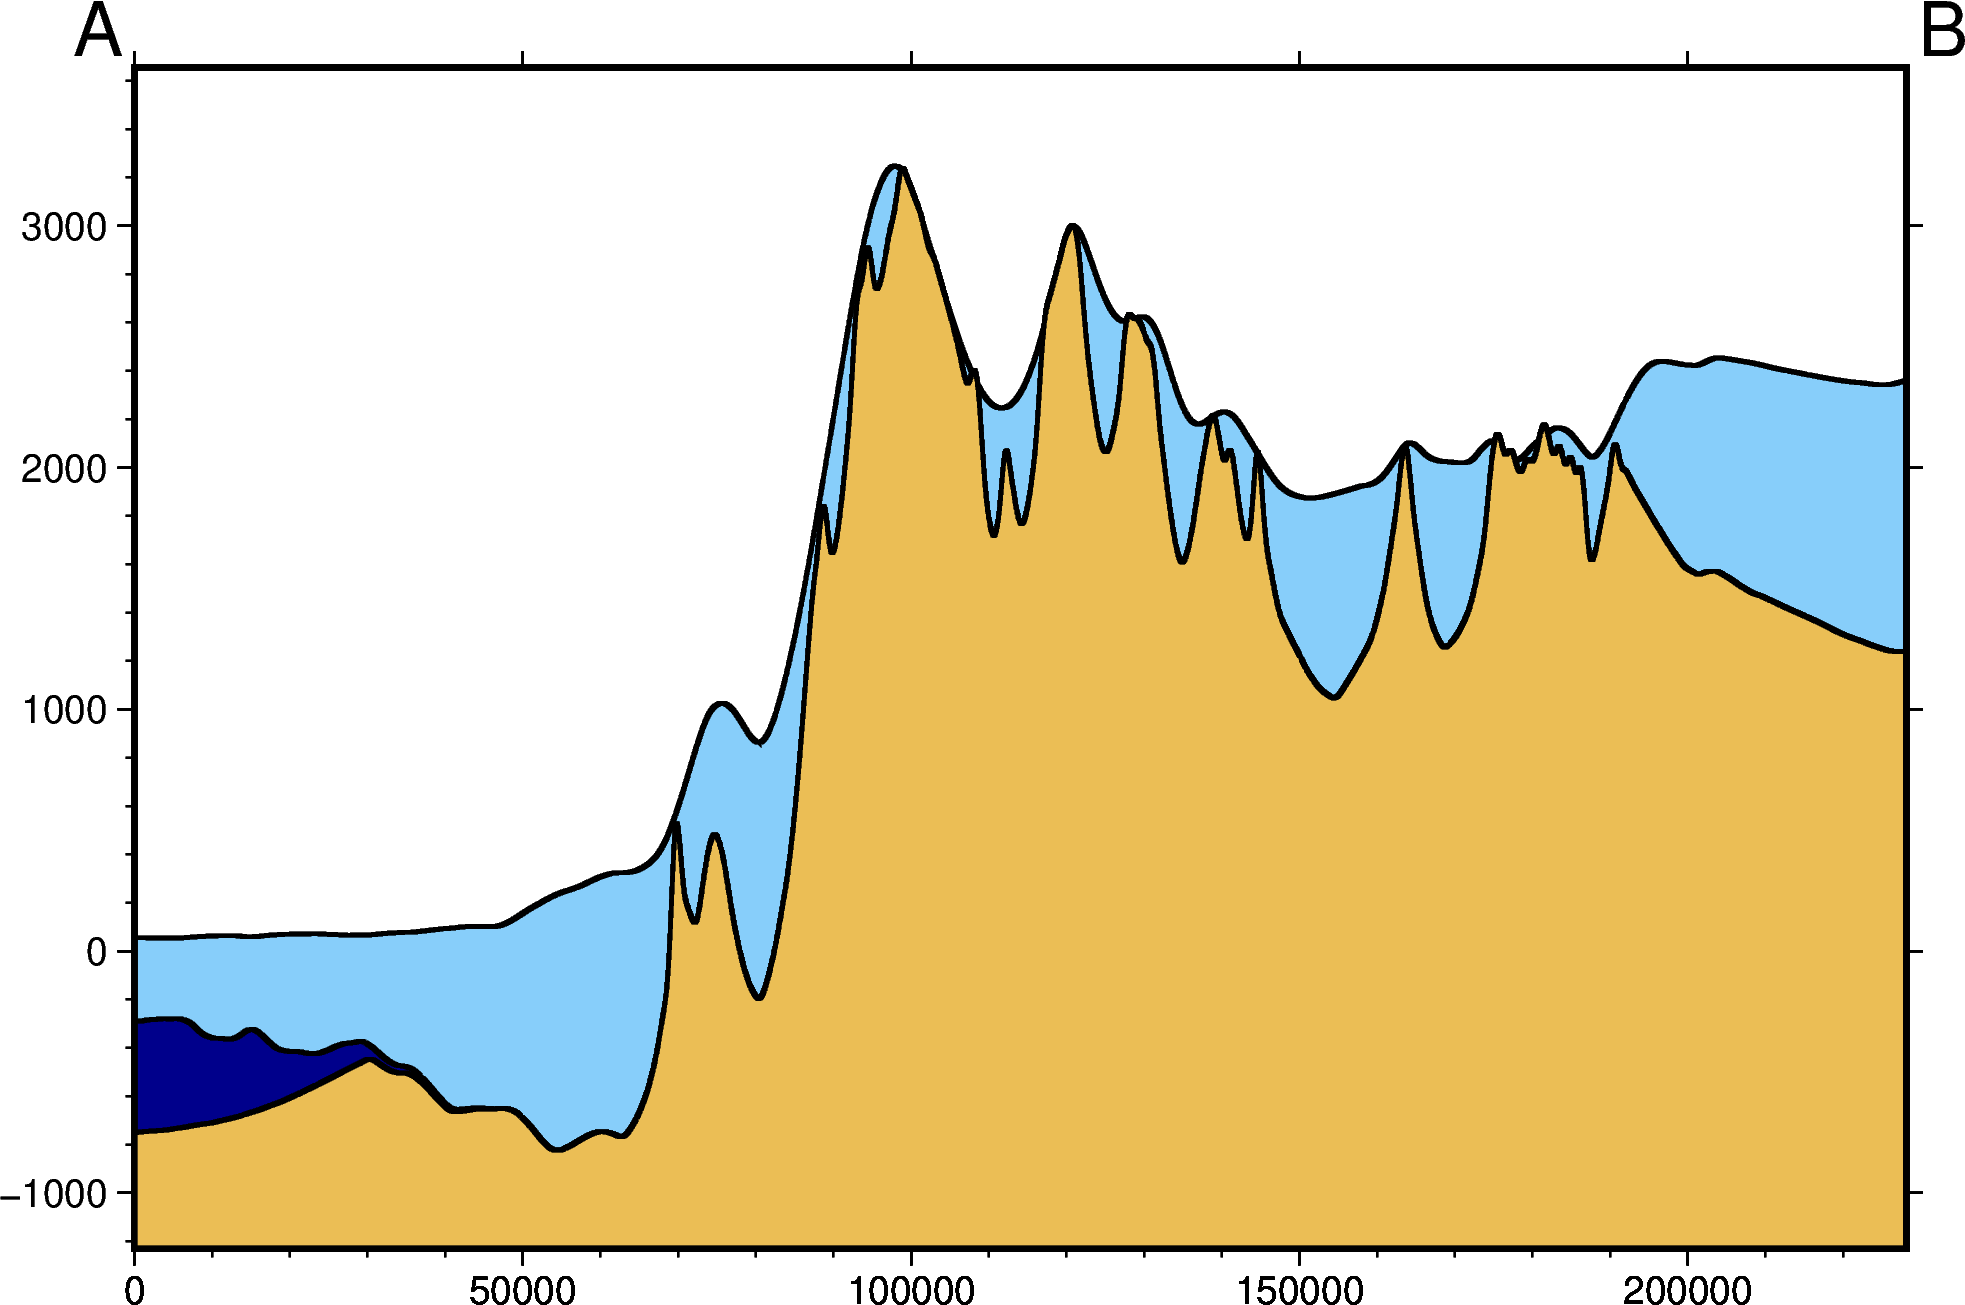

In [ ]:
fig_height = 10
fig_width = 15
fig, _, _ = profiles.plot_profile(
    "points",
    start=a,
    stop=b,
    num=100000,
    fig_height=fig_height,
    fig_width=fig_width,
    # add_map=True,
    # map_buffer=0.2,
    # subplot_orientation='horizontal',
    # subplot_orientation='vertical',
    layers_dict=None,
    # clip=True,
    # min_dist=600e3,
    # max_dist=800e3,
)
fig.show()